In [13]:
import sys
import numpy
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *
from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *

setup_logging()
data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/Conn_nogauss/A','store_stimuli': False}),replace=True)


_connections = data_store.get_analysis_result(identifier='Connections')
for ads in _connections:
        print ads.proj_name


NeuronAnnotationsToPerNeuronValues(data_store,ParameterSet({})).analyse()

analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()
spike_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_spike_train_ids()

l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')
l4_exc_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Exc_L4')

l4_exc = analog_ids[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or[0].get_value_by_id(analog_ids),l4_exc_phase[0].get_value_by_id(analog_ids))])]

INFO:Mozaik:Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues analysis
INFO:Mozaik:Starting NeuronAnnotationsToPerNeuronValues Analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis


V1AffConnectionOn
V1AffConnectionOff
V1AffInhConnectionOn
V1AffInhConnectionOff


NeuronAnnotationsToPerNeuronValues analysis took: 0.274957180023seconds
NeuronAnnotationsToPerNeuronValues analysis took: 0.274957180023seconds


In [4]:
data_store.print_content(full_ADS=True)

INFO:Mozaik:DSV info:
  DSV info:
INFO:Mozaik:   Number of recordings: 12
     Number of recordings: 12
INFO:Mozaik:     InternalStimulus : 12
       InternalStimulus : 12
INFO:Mozaik:   Number of ADS: 22
     Number of ADS: 22
INFO:Mozaik:     Connections : 4
       Connections : 4
INFO:Mozaik:     PerNeuronValue : 18
       PerNeuronValue : 18
INFO:Mozaik:ANALYSIS RESULTS
  ANALYSIS RESULTS
INFO:Mozaik:{"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'connection storage', "identifier":'Connections', "name":'Connections', "neuron":None, "proj_name":'V1AffConnectionOn', "sheet_name":None, "source_name":'X_ON', "stimulus_id":None, "target_name":'V1_Exc_L4'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'connection storage', "identifier":'Connections', "name":'Connections', "neuron":None, "proj_name":'V1AffConnectionOn', "sheet_name":None, "source_name":'X_ON', "stimulus_id":None, "target_name":'V1_Exc_L4'}
INFO:Mozaik:{"module_path" :"moz

INFO:Mozaik:{"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L4', "stimulus_id":None, "value_name":'aff_samples'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L4', "stimulus_id":None, "value_name":'aff_samples'}
INFO:Mozaik:{"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":6.283185307179586, "sheet_name":'V1_Inh_L4', "stimulus_id":None, "value_name":'LGNAfferentPhase'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":

In [167]:
# lets find corner neurons
x = data_store.get_neuron_postions()['V1_Exc_L4'][0]
y = data_store.get_neuron_postions()['V1_Exc_L4'][1]
corner_neuron = l4_exc_or[0].ids[numpy.argmin(numpy.sqrt(numpy.multiply(x,x)+numpy.multiply(y,y)))]

In [14]:
%matplotlib inline
reload(mozaik.visualization.plotting)
dsv = param_filter_query(data_store,identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation')
#dsv = param_filter_query(data_store,identifier='PerNeuronValue',value_name = 'LGNAfferentPhase')
mozaik.visualization.plotting.ConnectivityPlot(data_store,ParameterSet({'neuron' : 16458, 'reversed' : True,'sheet_name' : 'V1_Exc_L4'}),pnv_dsv=dsv,fig_param={'dpi' : 300,'figsize': (68,24)}).plot()
mozaik.visualization.plotting.ConnectivityPlot(data_store,ParameterSet({'neuron' : 25296, 'reversed' : True,'sheet_name' : 'V1_Exc_L4'}),pnv_dsv=dsv,fig_param={'dpi' : 300,'figsize': (68,24)}).plot()
mozaik.visualization.plotting.ConnectivityPlot(data_store,ParameterSet({'neuron' : 15031, 'reversed' : True,'sheet_name' : 'V1_Exc_L4'}),pnv_dsv=dsv,fig_param={'dpi' : 300,'figsize': (68,24)}).plot()
mozaik.visualization.plotting.ConnectivityPlot(data_store,ParameterSet({'neuron' : 30883, 'reversed' : True,'sheet_name' : 'V1_Exc_L4'}),pnv_dsv=dsv,fig_param={'dpi' : 300,'figsize': (68,24)}).plot()


ConnectivityPlot plotting took: 3.39688301086seconds
ConnectivityPlot plotting took: 3.39688301086seconds
ConnectivityPlot plotting took: 3.35726308823seconds
ConnectivityPlot plotting took: 3.35726308823seconds
ConnectivityPlot plotting took: 3.38404393196seconds
ConnectivityPlot plotting took: 3.38404393196seconds
ConnectivityPlot plotting took: 3.3807888031seconds
ConnectivityPlot plotting took: 3.3807888031seconds


PerNeuronValuePlot plotting took: 2.72971200943seconds
PerNeuronValuePlot plotting took: 2.72971200943seconds
PerNeuronValuePlot plotting took: 2.72971200943seconds
PerNeuronValuePlot plotting took: 2.72971200943seconds


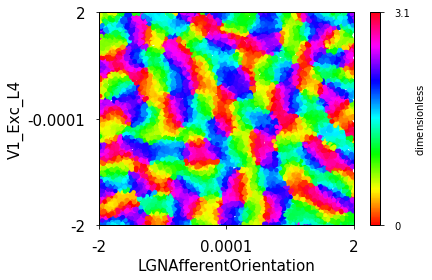

In [30]:
reload(mozaik.visualization.plotting)
dsv = param_filter_query(data_store,sheet_name=['V1_Exc_L4'],value_name='LGNAfferentOrientation')   
mozaik.visualization.plotting.PerNeuronValuePlot(dsv,ParameterSet({"cortical_view" : True}),plot_file_name='ORSet.png').plot()
            

In [3]:
def gabor(x1, y1, x2, y2, orientation, frequency, phase, size, aspect_ratio):
    X = (x1 - x2) * numpy.cos(orientation) + (y1 - y2) * numpy.sin(orientation)
    Y = -(x1 - x2) * numpy.sin(orientation) + (y1 - y2) * numpy.cos(orientation)
    ker = - (X*X + Y*Y*(aspect_ratio**2)) / (2*(size**2))
    
    return numpy.exp(ker)*numpy.cos(2*numpy.pi*X*frequency + phase)

def gauss(x1, y1, x2, y2, orientation, size,aspect_ratio):
    X = (x1 - x2) * numpy.cos(orientation) + (y1 - y2) * numpy.sin(orientation)
    Y = -(x1 - x2) * numpy.sin(orientation) + (y1 - y2) * numpy.cos(orientation)
    ker = - (X*X + Y*Y*(aspect_ratio**2)) / (2*(size**2))
    return numpy.exp(ker)


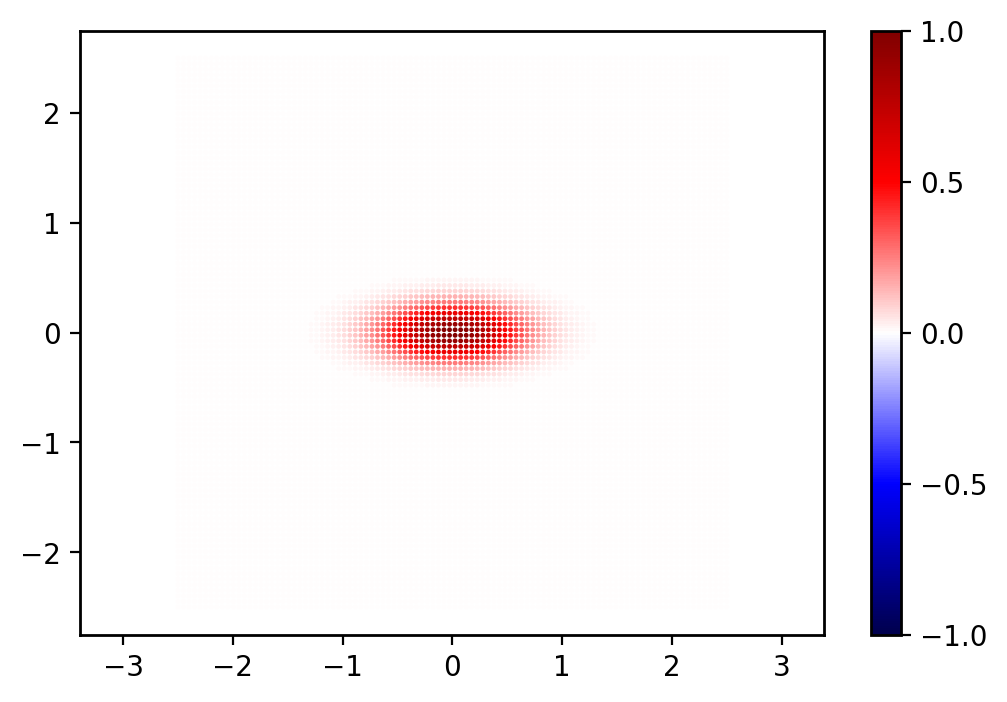

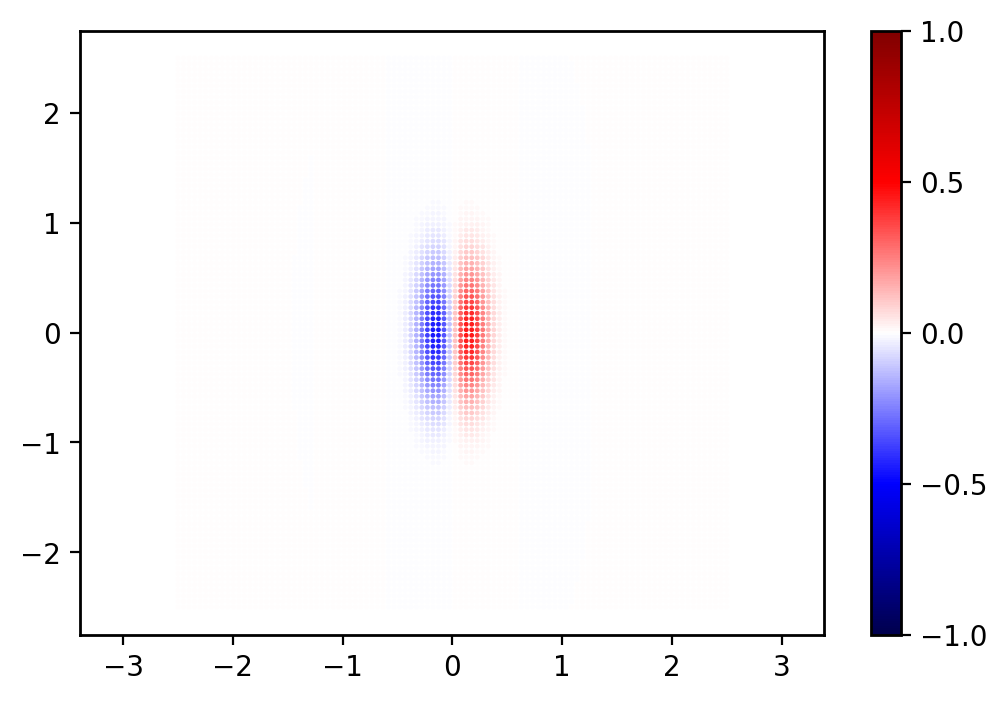

In [4]:
x = numpy.linspace(-2.5, 2.5, 100)
y = numpy.linspace(-2.5, 2.5, 100)
xv, yv = numpy.meshgrid(x, y)
g1 = gauss(xv.flatten(),yv.flatten(),0,0,numpy.pi/2,0.17,0.4)
g2 = gabor(xv.flatten(),yv.flatten(),0,0,numpy.pi,0.8,numpy.pi/2,0.17,0.4)

pylab.figure(dpi=200)
pylab.scatter(xv.flatten(),yv.flatten(),c=g1,cmap='seismic',vmin=-1,vmax=1,s=3)
pylab.colorbar()
pylab.axes().set_aspect('equal', 'datalim')

pylab.figure(dpi=200)
pylab.scatter(xv.flatten(),yv.flatten(),c=g2,cmap='seismic',vmin=-1,vmax=1,s=3)
pylab.colorbar()
pylab.axes().set_aspect('equal', 'datalim')

In [28]:
idd=22535

orr = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')[0].get_value_by_id(idd)
phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Exc_L4')[0].get_value_by_id(idd)

conn =  numpy.array(data_store.get_analysis_result(identifier='Connections',proj_name='V1AffConnectionOn')[0].weights)
sheet_idx = data_store.get_sheet_indexes('V1_Exc_L4',idd)
post_syn_idx = numpy.nonzero(conn[:,1].flatten()==sheet_idx)[0]
pre_syn_idx = conn[post_syn_idx,0].flatten().astype(int)

pre_syn_x_on = data_store.get_neuron_postions()['X_ON'][0][pre_syn_idx]
pre_syn_y_on = data_store.get_neuron_postions()['X_ON'][1][pre_syn_idx]
pre_syn_w_on = conn[post_syn_idx,2].flatten()

conn =  numpy.array(data_store.get_analysis_result(identifier='Connections',proj_name='V1AffConnectionOff')[0].weights)
sheet_idx = data_store.get_sheet_indexes('V1_Exc_L4',idd)
post_syn_idx = numpy.nonzero(conn[:,1].flatten()==sheet_idx)[0]
pre_syn_idx = conn[post_syn_idx,0].flatten().astype(int)

pre_syn_x_off = data_store.get_neuron_postions()['X_OFF'][0][pre_syn_idx]
pre_syn_y_off = data_store.get_neuron_postions()['X_OFF'][1][pre_syn_idx]
pre_syn_w_off = conn[post_syn_idx,2].flatten()


idx = l4_exc_or[0].ids.index(idd)
x = data_store.get_neuron_postions()['V1_Exc_L4'][0][idx]
y = data_store.get_neuron_postions()['V1_Exc_L4'][1][idx]

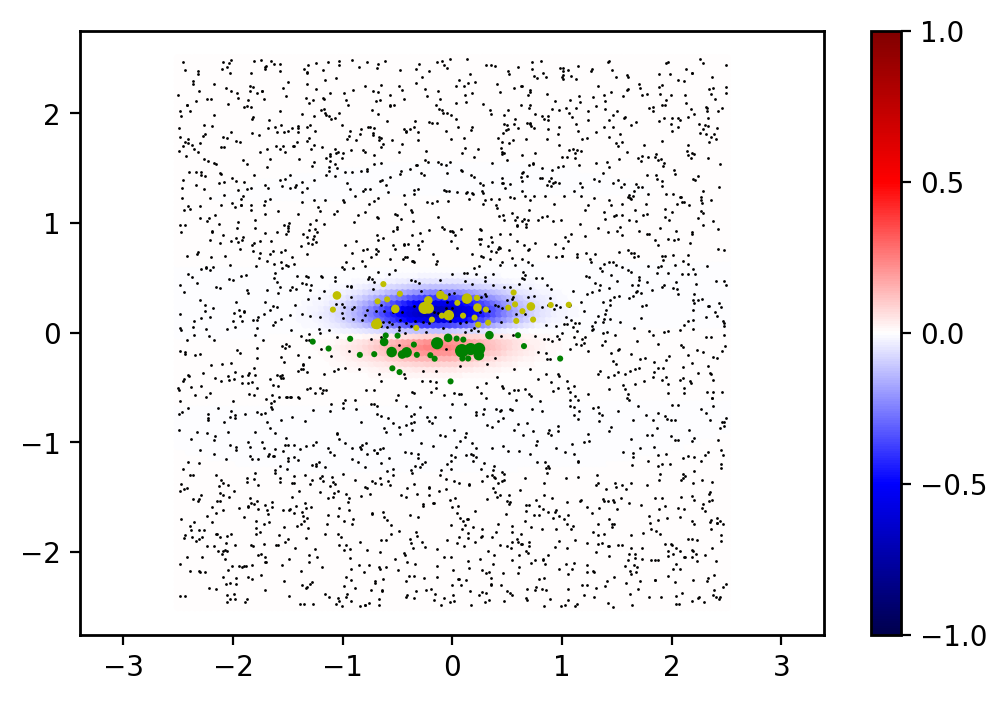

In [30]:
xv, yv = numpy.meshgrid(numpy.linspace(-2.5, 2.5, 100),numpy.linspace(-2.5, 2.5, 100))
g2 = gabor(xv.flatten(),yv.flatten(),x,y,orr+numpy.pi/2,0.8,phase,0.17,0.4)

pylab.figure(dpi=200)
pylab.scatter(xv.flatten(),yv.flatten(),c=g2,cmap='seismic',vmin=-1,vmax=1,s=10)
pylab.colorbar()
pylab.scatter(data_store.get_neuron_postions()['X_ON'][0],data_store.get_neuron_postions()['X_ON'][1],s=1,c='k')

pylab.scatter(pre_syn_x_on,pre_syn_y_on,s=3*pre_syn_w_on*1000,c='g')
pylab.scatter(pre_syn_x_off,pre_syn_y_off,s=3*pre_syn_w_off*1000,c='y')
pylab.axes().set_aspect('equal', 'datalim')
#pylab.xlim(-1,1)
#pylab.ylim(-1,1)





(-1, 1)

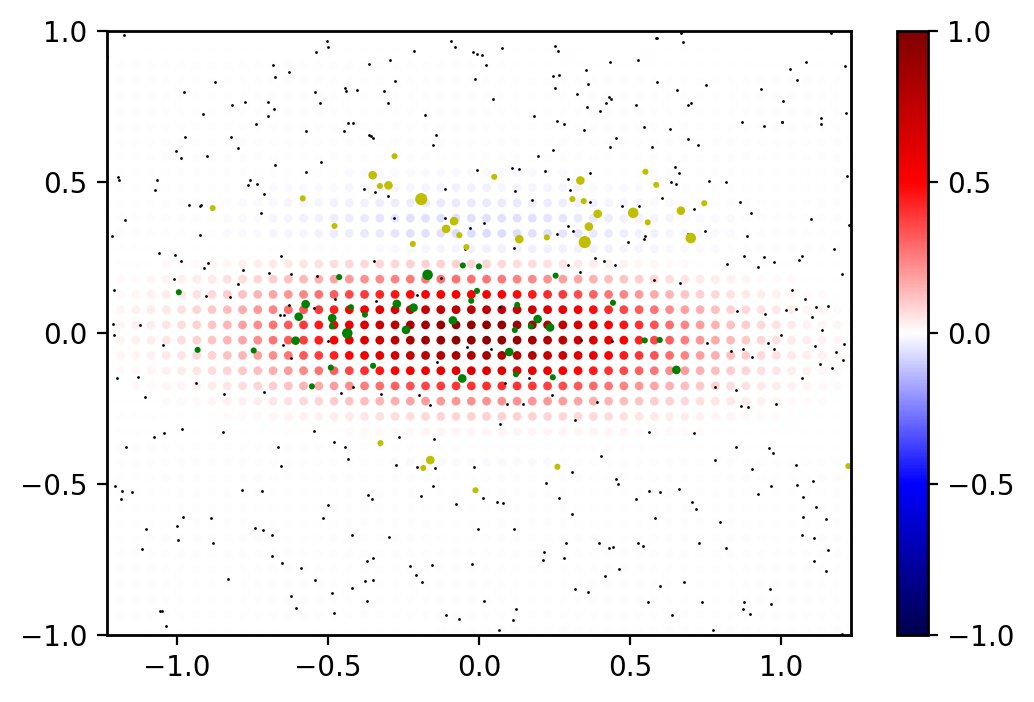

In [27]:
xv, yv = numpy.meshgrid(numpy.linspace(-2.5, 2.5, 100),numpy.linspace(-2.5, 2.5, 100))
g2 = gabor(xv.flatten(),yv.flatten(),x,y,orr+numpy.pi/2,0.8,phase,0.17,0.4)

pylab.figure(dpi=200)
pylab.scatter(xv.flatten(),yv.flatten(),c=g2,cmap='seismic',vmin=-1,vmax=1,s=10)
pylab.colorbar()
pylab.scatter(data_store.get_neuron_postions()['X_ON'][0],data_store.get_neuron_postions()['X_ON'][1],s=1,c='k')

pylab.scatter(pre_syn_x_on,pre_syn_y_on,s=3*pre_syn_w_on*1000,c='g')
pylab.scatter(pre_syn_x_off,pre_syn_y_off,s=3*pre_syn_w_off*1000,c='y')
pylab.axes().set_aspect('equal', 'datalim')
pylab.xlim(-1,1)
pylab.ylim(-1,1)
